In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


# Load the CSV file
df = pd.read_csv("TV.csv")

# Remove the currency symbol and commas from the Price column and convert to numeric
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Multiply each value in the Price column by 0.012 and store the result in the same column, formatted to two decimal places
df['Price'] = (df['Price'] * 0.012).round(2)

# 
df.head(10)






,Unnamed: 0,Brand,Model Name,Display Size,Operating System,Picture Quality,Smart Tv,Sound Technology,Refresh Rate,Screen Type,Connectivity,Price
0,0,Mi,L40M8-5AIN,100 cm (40 inch),Google TV,"Full HD, 1920 x 1080",Yes,NaN,60 Hz,LED,2 HDMI | 2 USB,251.99
1,1,SONY,KD - 43X74K,108 cm (43 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Clear Phase, S-Master Digital Amplifier, Dolby...",60 Hz,LED,3 HDMI | 2 USB,455.88
2,2,SONY,KD-55X74K,138.8 cm (55 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,629.88
3,3,SAMSUNG,UA55CUE70AKLXL,138 cm (55 inch),Tizen,"Ultra HD (4K), 3840 x 2160",Yes,NaN,50 Hz,LED,3 (Rear) HDMI | 1 (Rear) USB,515.88
4,4,MOTOROLA,32HDGDMBSXP,80 cm (32 inch),Google TV,"HD Ready, 1366 x 768",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,131.99
5,5,MOTOROLA,43UHDGDMBSXP,109 cm (43 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Dolby Digital, Dolby Digital Plus",60 Hz,LED,3 HDMI | 2 USB,263.99
6,6,Hisense,50E7K,126 cm (50 inch),VIDAA,"Ultra HD (4K), 3840 × 2160",Yes,"Dolby Atmos, Dolby Audio, Stereo Speaker",60 Hz,QLED,3 HDMI | 2 USB,335.99
7,7,MOTOROLA,65UHDGQMBSGQ,165 cm (65 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Dolby Atmos, Dolby Digital, Dolby Digital Plus",60 Hz,QLED,3 HDMI | 2 USB,491.99
8,8,SONY,KD-43X64L,108 cm (43 inch),Google TV,"Ultra HD (4K), 3840 x 2160",Yes,NaN,60 Hz,LED,3 HDMI | 1 USB,491.88
9,9,MOTOROLA,40FHDGDMBSXP,102 cm (40 inch),Google TV,"Full HD, 1920 x 1080",Yes,"Dolby Digital, Dolby Digital Plus",60 Hz,LED,2 HDMI | 2 USB,203.99


In [26]:

# Extract only the measurement in inches from the Display Size column and replace the original column
df['Display Size'] = df['Display Size'].str.extract(r'(\d+ inch)')[0]

df.head(10)

,Unnamed: 0,Brand,Model Name,Display Size,Operating System,Picture Quality,Smart Tv,Sound Technology,Refresh Rate,Screen Type,Connectivity,Price
0,0,Mi,L40M8-5AIN,40 inch,Google TV,"Full HD, 1920 x 1080",Yes,NaN,60 Hz,LED,2 HDMI | 2 USB,251.99
1,1,SONY,KD - 43X74K,43 inch,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Clear Phase, S-Master Digital Amplifier, Dolby...",60 Hz,LED,3 HDMI | 2 USB,455.88
2,2,SONY,KD-55X74K,55 inch,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,629.88
3,3,SAMSUNG,UA55CUE70AKLXL,55 inch,Tizen,"Ultra HD (4K), 3840 x 2160",Yes,NaN,50 Hz,LED,3 (Rear) HDMI | 1 (Rear) USB,515.88
4,4,MOTOROLA,32HDGDMBSXP,32 inch,Google TV,"HD Ready, 1366 x 768",Yes,NaN,60 Hz,LED,3 HDMI | 2 USB,131.99
5,5,MOTOROLA,43UHDGDMBSXP,43 inch,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Dolby Digital, Dolby Digital Plus",60 Hz,LED,3 HDMI | 2 USB,263.99
6,6,Hisense,50E7K,50 inch,VIDAA,"Ultra HD (4K), 3840 × 2160",Yes,"Dolby Atmos, Dolby Audio, Stereo Speaker",60 Hz,QLED,3 HDMI | 2 USB,335.99
7,7,MOTOROLA,65UHDGQMBSGQ,65 inch,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,"Dolby Atmos, Dolby Digital, Dolby Digital Plus",60 Hz,QLED,3 HDMI | 2 USB,491.99
8,8,SONY,KD-43X64L,43 inch,Google TV,"Ultra HD (4K), 3840 x 2160",Yes,NaN,60 Hz,LED,3 HDMI | 1 USB,491.88
9,9,MOTOROLA,40FHDGDMBSXP,40 inch,Google TV,"Full HD, 1920 x 1080",Yes,"Dolby Digital, Dolby Digital Plus",60 Hz,LED,2 HDMI | 2 USB,203.99


In [27]:
df.dtypes

Unnamed: 0            int64
Brand                object
Model Name           object
Display Size         object
Operating System     object
Picture Quality      object
Smart Tv             object
Sound Technology     object
Refresh Rate         object
Screen Type          object
Connectivity         object
Price               float64
dtype: object

In [28]:
# Deletes data columns that are have low contribution to TV price
df = df.drop(['Unnamed: 0', 'Model Name', 'Operating System', 'Smart Tv', 'Sound Technology', 'Connectivity'], axis=1)

df.head(10)

,Brand,Display Size,Picture Quality,Refresh Rate,Screen Type,Price
0,Mi,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,251.99
1,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,455.88
2,SONY,55 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,629.88
3,SAMSUNG,55 inch,"Ultra HD (4K), 3840 x 2160",50 Hz,LED,515.88
4,MOTOROLA,32 inch,"HD Ready, 1366 x 768",60 Hz,LED,131.99
5,MOTOROLA,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,263.99
6,Hisense,50 inch,"Ultra HD (4K), 3840 × 2160",60 Hz,QLED,335.99
7,MOTOROLA,65 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,QLED,491.99
8,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,491.88
9,MOTOROLA,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,203.99


In [29]:
# Renames columns to names with units to prepare their values for being stored numerically
df = df.rename(columns={"Display Size": "Display Size (in.)", "Picture Quality": "Picture Quality (Pixels)" , "Refresh Rate": "Refresh Rate (Hz)", "Price": "Price ($)"})

df.head(10)

,Brand,Display Size (in.),Picture Quality (Pixels),Refresh Rate (Hz),Screen Type,Price ($)
0,Mi,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,251.99
1,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,455.88
2,SONY,55 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,629.88
3,SAMSUNG,55 inch,"Ultra HD (4K), 3840 x 2160",50 Hz,LED,515.88
4,MOTOROLA,32 inch,"HD Ready, 1366 x 768",60 Hz,LED,131.99
5,MOTOROLA,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,263.99
6,Hisense,50 inch,"Ultra HD (4K), 3840 × 2160",60 Hz,QLED,335.99
7,MOTOROLA,65 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,QLED,491.99
8,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,491.88
9,MOTOROLA,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,203.99


In [30]:
# Number of (rows, columns)
df.shape

(975, 6)

In [31]:
# Scans for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(452, 6)


In [32]:
# Deletes all duplicate rows
df = df.drop_duplicates()

df.head(10)

,Brand,Display Size (in.),Picture Quality (Pixels),Refresh Rate (Hz),Screen Type,Price ($)
0,Mi,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,251.99
1,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,455.88
2,SONY,55 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,629.88
3,SAMSUNG,55 inch,"Ultra HD (4K), 3840 x 2160",50 Hz,LED,515.88
4,MOTOROLA,32 inch,"HD Ready, 1366 x 768",60 Hz,LED,131.99
5,MOTOROLA,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,263.99
6,Hisense,50 inch,"Ultra HD (4K), 3840 × 2160",60 Hz,QLED,335.99
7,MOTOROLA,65 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,QLED,491.99
8,SONY,43 inch,"Ultra HD (4K), 3840 x 2160",60 Hz,LED,491.88
9,MOTOROLA,40 inch,"Full HD, 1920 x 1080",60 Hz,LED,203.99


In [33]:
df.shape


(523, 6)

In [34]:
# Search for rows with null or missing values
print(df.isnull().sum())

Brand                        0
Display Size (in.)          10
Picture Quality (Pixels)     9
Refresh Rate (Hz)           14
Screen Type                  9
Price ($)                    0
dtype: int64


In [35]:
# Deletes rows with duplicate values
df = df.dropna()

df.shape

(499, 6)

In [36]:
print(df.isnull().sum())

Brand                       0
Display Size (in.)          0
Picture Quality (Pixels)    0
Refresh Rate (Hz)           0
Screen Type                 0
Price ($)                   0
dtype: int64


In [37]:
# Extract only the numeric value from the Display Size column
df['Display Size (in.)'] = df['Display Size (in.)'].str.extract(r'(\d+)').astype(int)

# Extract only the numeric value from the Refresh Rate column
df['Refresh Rate (Hz)'] = df['Refresh Rate (Hz)'].str.extract(r'(\d+)').astype(int)

# Extract the first numerical value from the Picture Quality column
df['Picture Quality (Pixels)'] = df['Picture Quality (Pixels)'].str.extract(r'(\d+)').astype(int)

# Custom function to convert the detected 4 from 4K to 3840 pixel value
def convert_picture_quality(value):
    if value == 4:
        return 3840
    elif value == 1:
        return 1920
    elif value == 7:
        return 1366
    else:
        return value

df['Picture Quality (Pixels)'] = df['Picture Quality (Pixels)'].apply(convert_picture_quality)


In [38]:
df.dtypes

Brand                        object
Display Size (in.)            int32
Picture Quality (Pixels)      int64
Refresh Rate (Hz)             int32
Screen Type                  object
Price ($)                   float64
dtype: object

In [39]:
df.head(10)

,Brand,Display Size (in.),Picture Quality (Pixels),Refresh Rate (Hz),Screen Type,Price ($)
0,Mi,40,1920,60,LED,251.99
1,SONY,43,3840,60,LED,455.88
2,SONY,55,3840,60,LED,629.88
3,SAMSUNG,55,3840,50,LED,515.88
4,MOTOROLA,32,1366,60,LED,131.99
5,MOTOROLA,43,3840,60,LED,263.99
6,Hisense,50,3840,60,QLED,335.99
7,MOTOROLA,65,3840,60,QLED,491.99
8,SONY,43,3840,60,LED,491.88
9,MOTOROLA,40,1920,60,LED,203.99


<Axes: xlabel='Price ($)'>

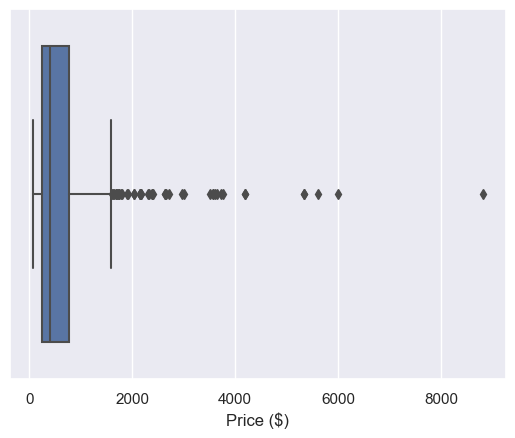

In [40]:
sns.boxplot (x=df['Price ($)'])

In [41]:
# L
df = df[(df['Price ($)'] >= 200) & (df['Price ($)'] <= 1450)]

df.shape

(346, 6)

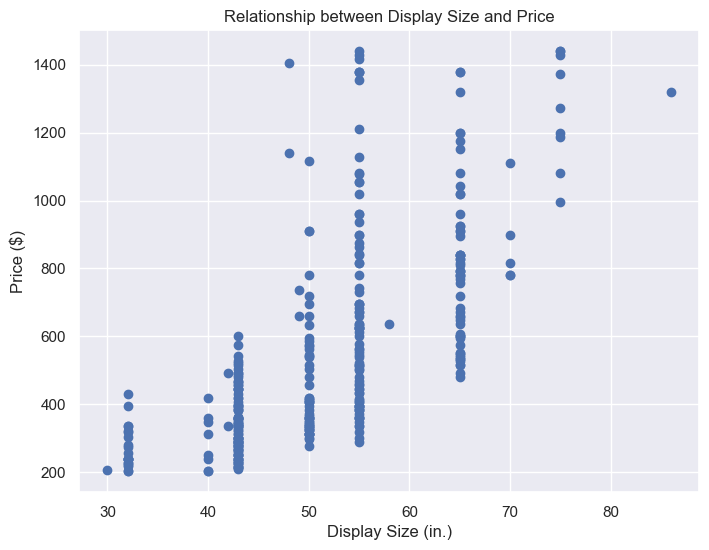

In [42]:
df['Display Size (in.)'] = df['Display Size (in.)']
plt.figure(figsize=(8, 6))
plt.scatter(df['Display Size (in.)'], df['Price ($)'])
plt.xlabel('Display Size (in.)')
plt.ylabel('Price ($)')
plt.title('Relationship between Display Size and Price')
plt.show()

In [43]:
# Calculate average price for each brand and sort in descending order
brand_avg_price = df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
brand_rank_mapping = {brand: rank for rank, brand in enumerate(brand_avg_price.index, 1)}
df['Brand $ Rank'] = df['Brand'].map(brand_rank_mapping)

# Reorder the columns
columns = list(df.columns)
brand_index = columns.index('Brand')
columns.insert(brand_index + 1, columns.pop(columns.index('Brand $ Rank')))
df = df[columns]

df.head(100)

,Brand,Brand $ Rank,Display Size (in.),Picture Quality (Pixels),Refresh Rate (Hz),Screen Type,Price ($)
0,Mi,31,40,1920,60,LED,251.99
1,SONY,4,43,3840,60,LED,455.88
2,SONY,4,55,3840,60,LED,629.88
3,SAMSUNG,5,55,3840,50,LED,515.88
5,MOTOROLA,20,43,3840,60,LED,263.99
...,...,...,...,...,...,...,...
247,MOTOROLA,20,50,3840,60,LED,419.99
249,Blaupunkt,13,43,3840,60,LED,299.99
250,Hisense,12,65,3840,60,LED,599.88
252,SONY,4,50,3840,50,LED,695.28


In [44]:
df.dtypes

Brand                        object
Brand $ Rank                  int64
Display Size (in.)            int32
Picture Quality (Pixels)      int64
Refresh Rate (Hz)             int32
Screen Type                  object
Price ($)                   float64
dtype: object

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for normalization
numerical_columns = ['Brand $ Rank', 'Display Size (in.)', 'Picture Quality (Pixels)', 'Refresh Rate (Hz)']

# Perform min-max normalization on the selected numerical columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split the data into features (X) and target variable (y)
X = df[['Brand $ Rank', 'Display Size (in.)', 'Picture Quality (Pixels)', 'Refresh Rate (Hz)']]
y = df['Price ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=10)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the price on the testing data
y_pred = knn.predict(X_test)



In [47]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean of the prices
mean_price = df['Price ($)'].mean()

# Calculate the standard deviation of the prices
std_price = df['Price ($)'].std()

# Perform k-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
average_cv_score = np.mean(cv_scores) #Average of cross-validation scores

print(f'Mean Price: {mean_price}')
print(f'Standard Deviation of Price: {std_price}')

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

print("Cross Validation Scores:", cv_scores)

print(f'Average Cross-Validation Score (R²): {average_cv_score:.2f}%')

Mean Price: 556.2806069364161
Standard Deviation of Price: 307.7285976507454
Root Mean Squared Error (RMSE): 146.47580913374645
Mean Absolute Error (MAE): 100.07755714285717
Cross Validation Scores: [0.39536031 0.82642936 0.61881642 0.69651899 0.8240836 ]
Average Cross-Validation Score (R²): 0.67%
